
# Sentiment Analysis Measures: Polarity & Subjectivity


In my previous post https://github.com/kyramichel/NLP/blob/master/Sentiment%20Analysis%20Comments.ipynb I used sentiment 

analysis on tweets that were already hand-tagged with sentiment: positive, neutral, negative (1 of 3 categories).

For the purpose of this Sentiment Analysis exercise, I will work only with unstructured text data. This is useful since most often we have text available, such as from webpages (using web scraping) and we want to perform Sentiment Analysis (ie, opiniin mining) on such unstructured text.

 
There are 2 measures to analyze the sentiment from text:

1. Polarity (how positive or negative an opinion is):

Polarity measure ranges from -1 to 1, where 1 (positive), 0 (neutral) and -1 (negative)

2. Subjectivity measure, which ranges from 0 to 1, where  0 (objective) and 1 (subjective)


One easy way to perform Sentiment Analysis is using TextBlob -  TextBlob(text).sentiment will gives us both the Polarity and Subjectivity 

Data can be downloaded from:

https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment


In [1]:
import numpy as np 
import pandas as pd 

import re
import nltk

from textblob import TextBlob

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
tweets = pd.read_csv("Tweets.csv")
tweets.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [3]:
tweets.shape

(14640, 2)

In [4]:
#no missing values 
tweets.isna().sum()

airline_sentiment    0
text                 0
dtype: int64

Text data:

In [5]:
# dropping unwanted column: airline_sentiment
data = tweets.drop('airline_sentiment', axis=1)
data.head()

,text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials t...
2,@VirginAmerica I didn't today... Must mean I n...
3,@VirginAmerica it's really aggressive to blast...
4,@VirginAmerica and it's a really big bad thing...


In [6]:
#cleaning text by removing special characters 

def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', text) 
    return text


data['text'] = data['text'].apply(clean)
data.head()

,text
0,VirginAmerica What dhepburn said
1,VirginAmerica plus you ve added commercials t...
2,VirginAmerica I didn t today Must mean I need...
3,VirginAmerica it s really aggressive to blast...
4,VirginAmerica and it s a really big bad thing...


1.Sentiment analysis

In [7]:
#calculate polarity
def polarity(text):
    return TextBlob(text).sentiment.polarity


data['polarity'] = data['text'].apply(polarity) 

In [8]:

def sentiment_analysis(p):
    if p < 0:
        return 'Negative'
    elif p == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [9]:
data['sentiment_analysis'] = data['polarity'].apply(sentiment_analysis)
data.head()

,text,polarity,sentiment_analysis
0,VirginAmerica What dhepburn said,0.00000,Neutral
1,VirginAmerica plus you ve added commercials t...,0.00000,Neutral
2,VirginAmerica I didn t today Must mean I need...,-0.31250,Negative
3,VirginAmerica it s really aggressive to blast...,0.00625,Positive
4,VirginAmerica and it s a really big bad thing...,-0.35000,Negative


Let's count the number of positive, negative, neutral:

In [10]:
data['sentiment_analysis'].value_counts()

Neutral     5514
Positive    5475
Negative    3651
Name: sentiment_analysis, dtype: int64

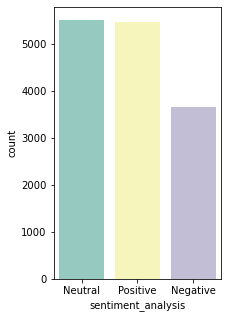

In [12]:
#plotting the sentiment categories 
import seaborn as sns
plt.figure(figsize=(3,5))
sns.countplot(data['sentiment_analysis'], order =data.sentiment_analysis.value_counts().index,palette="Set3")
plt.show()

In [ ]:
Calculating the % of positive, neutral and negative comments:

In [13]:
data['sentiment_analysis'].value_counts() / len(data)


Neutral     0.376639
Positive    0.373975
Negative    0.249385
Name: sentiment_analysis, dtype: float64

Note: As shown in my previous post, 62% of the comments were hand-labeled as negative, 21% neutral and 16% as positive. 
Based on our sentiment analysis, the number of positive and negative reviwes are almost the same.

Are we subjective in our sentiment analysis?

2.Subjectivity:


In [14]:
#calculate subjectivity

def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

data['subjectivity'] = data['text'].apply(subjectivity) 
data.head()

,text,polarity,sentiment_analysis,subjectivity
0,VirginAmerica What dhepburn said,0.00000,Neutral,0.000000
1,VirginAmerica plus you ve added commercials t...,0.00000,Neutral,0.000000
2,VirginAmerica I didn t today Must mean I need...,-0.31250,Negative,0.687500
3,VirginAmerica it s really aggressive to blast...,0.00625,Positive,0.350000
4,VirginAmerica and it s a really big bad thing...,-0.35000,Negative,0.383333


In [15]:
def subjectivity_analysis(s):
    if s < 0.5:
        return 'Subjective'
    else:
        return 'Objective'

In [16]:
data['subjectivity_analysis'] = data['subjectivity'].apply(subjectivity_analysis)
data.head()

,text,polarity,sentiment_analysis,subjectivity,subjectivity_analysis
0,VirginAmerica What dhepburn said,0.00000,Neutral,0.000000,Subjective
1,VirginAmerica plus you ve added commercials t...,0.00000,Neutral,0.000000,Subjective
2,VirginAmerica I didn t today Must mean I need...,-0.31250,Negative,0.687500,Objective
3,VirginAmerica it s really aggressive to blast...,0.00625,Positive,0.350000,Subjective
4,VirginAmerica and it s a really big bad thing...,-0.35000,Negative,0.383333,Subjective


([<matplotlib.patches.Wedge at 0x28a0039d310>,
 [Text(-0.43161420497014574, 1.01178514422183, 'Subjective'),
  Text(0.43161411023998214, -1.0117851846324637, 'Objective')])

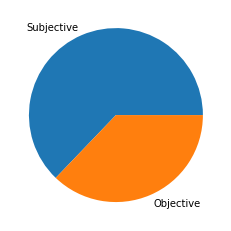

In [71]:
count= data.subjectivity_analysis.value_counts()

plt.pie(count.values, labels = count.index)

Note: one way to improve the sentiment analysis is to use NLP techniques such as: POS(parts of Speech) tagging to convert each word into (word, tag) that will help preserve the context of the word and then Lemmatization for preprocessing the text data prior performing sentiment analysis.